In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
from datetime import datetime

from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

import gmaps

# Import the API key.
from config import g_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8


In [4]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8&q=Boston


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
city_weather.status_code

200

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":78.19,"feels_like":78.82,"temp_min":72,"temp_max":84,"pressure":1025,"humidity":53},"wind":{"speed":4.45,"deg":111},"clouds":{"all":0},"dt":1592417033,"sys":{"type":1,"id":4967,"country":"US","sunrise":1592384819,"sunset":1592439816},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 78.19,
  'feels_like': 78.82,
  'temp_min': 72,
  'temp_max': 84,
  'pressure': 1025,
  'humidity': 53},
 'wind': {'speed': 4.45, 'deg': 111},
 'clouds': {'all': 0},
 'dt': 1592417033,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1592384819,
  'sunset': 1592439816},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8&q=Boston


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 78.19,
  'feels_like': 78.82,
  'temp_min': 72,
  'temp_max': 84,
  'pressure': 1025,
  'humidity': 53},
 'wind': {'speed': 4.45, 'deg': 111},
 'clouds': {'all': 0},
 'dt': 1592417033,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1592384819,
  'sunset': 1592439816},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["sys"]

{'type': 1,
 'id': 4967,
 'country': 'US',
 'sunrise': 1592384819,
 'sunset': 1592439816}

In [18]:
boston_data["sys"]["country"]

'US'

In [19]:
boston_data["dt"]

1592417033

In [20]:
boston_data["coord"]["lat"]

42.36

In [21]:
boston_data["main"]["temp_max"]

84

In [22]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 84 53 0 4.45


In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 17, 18, 3, 53)

In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | moba
Processing Record 3 of Set 1 | axim
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | abeche
Processing Record 6 of Set 1 | carman
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | saint-francois
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | kerman
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | veraval
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | parfino
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | puerto colombia
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | cowra
Processing Record 23 of Set 1 | tarbert
Processing R

Processing Record 38 of Set 4 | ust-maya
Processing Record 39 of Set 4 | san jose
Processing Record 40 of Set 4 | ponta do sol
Processing Record 41 of Set 4 | cayenne
Processing Record 42 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | klyavlino
Processing Record 45 of Set 4 | nikolskoye
Processing Record 46 of Set 4 | lazaro cardenas
Processing Record 47 of Set 4 | kimbe
Processing Record 48 of Set 4 | batagay-alyta
Processing Record 49 of Set 4 | pacific grove
Processing Record 50 of Set 4 | luyang
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | sistranda
Processing Record 3 of Set 5 | san carlos de bariloche
Processing Record 4 of Set 5 | ketchikan
Processing Record 5 of Set 5 | samusu
City not found. Skipping...
Processing Record 6 of Set 5 | karratha
Processing Record 7 of Set 5 | khani
Processing Record 8 of Set 5 | salalah
Processing Record 9 of Set 5 | avarua
Processing Record 10 of S

Processing Record 31 of Set 8 | takoradi
Processing Record 32 of Set 8 | naze
Processing Record 33 of Set 8 | sweetwater
Processing Record 34 of Set 8 | shahr-e babak
Processing Record 35 of Set 8 | krasne
Processing Record 36 of Set 8 | shingu
Processing Record 37 of Set 8 | rio gallegos
Processing Record 38 of Set 8 | dingle
Processing Record 39 of Set 8 | okakarara
Processing Record 40 of Set 8 | valleyview
Processing Record 41 of Set 8 | malakwal
Processing Record 42 of Set 8 | jinchang
Processing Record 43 of Set 8 | bokspits
City not found. Skipping...
Processing Record 44 of Set 8 | jalu
Processing Record 45 of Set 8 | stornoway
Processing Record 46 of Set 8 | meadow lake
Processing Record 47 of Set 8 | mancio lima
Processing Record 48 of Set 8 | chuy
Processing Record 49 of Set 8 | kamaishi
Processing Record 50 of Set 8 | kalmunai
Processing Record 1 of Set 9 | olinda
Processing Record 2 of Set 9 | wanlaweyn
Processing Record 3 of Set 9 | haibowan
City not found. Skipping...
Pr

Processing Record 18 of Set 12 | oranjestad
Processing Record 19 of Set 12 | kudahuvadhoo
Processing Record 20 of Set 12 | dewa
Processing Record 21 of Set 12 | chowchilla
Processing Record 22 of Set 12 | krasnoselkup
Processing Record 23 of Set 12 | tecoanapa
Processing Record 24 of Set 12 | rio grande
Processing Record 25 of Set 12 | beberibe
Processing Record 26 of Set 12 | mayumba
Processing Record 27 of Set 12 | port blair
Processing Record 28 of Set 12 | hervey bay
Processing Record 29 of Set 12 | maniitsoq
Processing Record 30 of Set 12 | souillac
Processing Record 31 of Set 12 | nagua
Processing Record 32 of Set 12 | raudeberg
Processing Record 33 of Set 12 | halalo
City not found. Skipping...
Processing Record 34 of Set 12 | bandarbeyla
Processing Record 35 of Set 12 | pak phanang
Processing Record 36 of Set 12 | calvinia
Processing Record 37 of Set 12 | tromso
Processing Record 38 of Set 12 | harbin
Processing Record 39 of Set 12 | dourbali
Processing Record 40 of Set 12 | ka

In [26]:
len(city_data)

566

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,75.56,79,55,18.30,PF,2020-06-17 18:03:59
1,Moba,33.23,105.02,53.11,86,0,5.10,CN,2020-06-17 18:03:59
2,Axim,4.87,-2.24,78.15,85,89,12.46,GH,2020-06-17 18:03:59
3,Kodiak,57.79,-152.41,50.00,87,90,20.80,US,2020-06-17 18:03:59
4,Abeche,13.83,20.83,86.99,38,66,8.14,TD,2020-06-17 18:03:59
5,Carman,49.50,-98.00,88.00,51,1,12.75,CA,2020-06-17 18:04:00
6,Busselton,-33.65,115.33,57.00,45,45,19.64,AU,2020-06-17 18:04:00
7,Saint-Francois,46.42,3.91,66.20,63,54,4.70,FR,2020-06-17 17:58:28
8,Chokurdakh,70.63,147.92,63.43,50,27,10.11,RU,2020-06-17 18:04:00
9,Puerto Ayora,-0.74,-90.35,75.20,78,75,11.41,EC,2020-06-17 18:04:00


In [28]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-06-17 18:03:59,-23.12,-134.97,75.56,79,55,18.30
1,Moba,CN,2020-06-17 18:03:59,33.23,105.02,53.11,86,0,5.10
2,Axim,GH,2020-06-17 18:03:59,4.87,-2.24,78.15,85,89,12.46
3,Kodiak,US,2020-06-17 18:03:59,57.79,-152.41,50.00,87,90,20.80
4,Abeche,TD,2020-06-17 18:03:59,13.83,20.83,86.99,38,66,8.14
5,Carman,CA,2020-06-17 18:04:00,49.50,-98.00,88.00,51,1,12.75
6,Busselton,AU,2020-06-17 18:04:00,-33.65,115.33,57.00,45,45,19.64
7,Saint-Francois,FR,2020-06-17 17:58:28,46.42,3.91,66.20,63,54,4.70
8,Chokurdakh,RU,2020-06-17 18:04:00,70.63,147.92,63.43,50,27,10.11
9,Puerto Ayora,EC,2020-06-17 18:04:00,-0.74,-90.35,75.20,78,75,11.41


In [29]:
new_city_data_df.count()

City          566
Country       566
Date          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
dtype: int64

In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
new_city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = new_city_data_df["Lat"]
max_temps = new_city_data_df["Max Temp"]
humidity = new_city_data_df["Humidity"]
cloudiness = new_city_data_df["Cloudiness"]
wind_speed = new_city_data_df["Wind Speed"]

In [32]:
# Import the time module.
import time

In [33]:
# # Get today's date in seconds.
# today = time.time()
# today

In [34]:
# today = time.strftime("%x")
# today

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

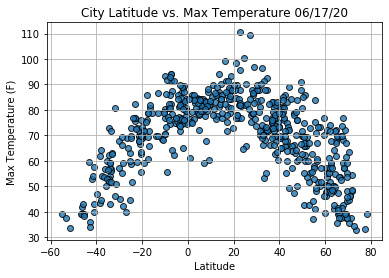

In [36]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

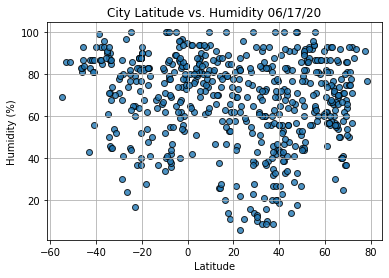

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

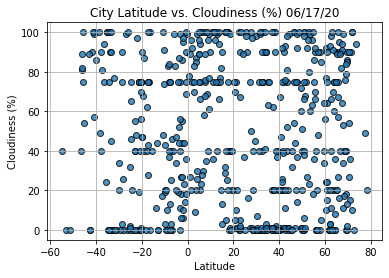

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

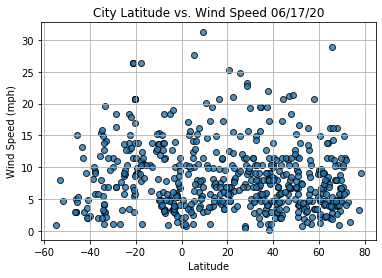

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [42]:
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Moba,33.23,105.02,53.11,86,0,5.10,CN,2020-06-17 18:03:59
2,Axim,4.87,-2.24,78.15,85,89,12.46,GH,2020-06-17 18:03:59
3,Kodiak,57.79,-152.41,50.00,87,90,20.80,US,2020-06-17 18:03:59
4,Abeche,13.83,20.83,86.99,38,66,8.14,TD,2020-06-17 18:03:59
5,Carman,49.50,-98.00,88.00,51,1,12.75,CA,2020-06-17 18:04:00
...,...,...,...,...,...,...,...,...,...
560,Zhigansk,66.77,123.37,52.52,92,89,11.21,RU,2020-06-17 18:05:51
561,Jinan,36.67,117.00,69.01,81,100,2.82,CN,2020-06-17 18:05:51
562,Salinas,36.68,-121.66,75.99,40,1,4.70,US,2020-06-17 18:01:59
563,Chumikan,54.72,135.31,37.18,96,100,3.11,RU,2020-06-17 18:05:52


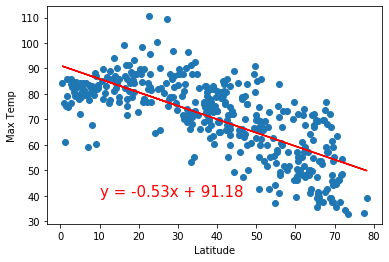

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

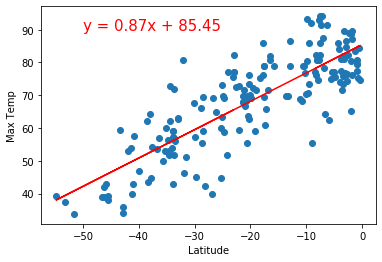

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp",(-50,90))

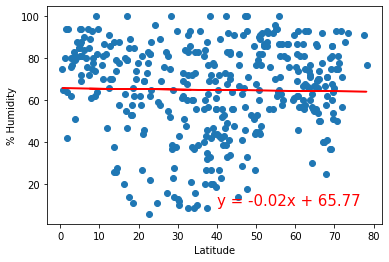

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (40, 10))

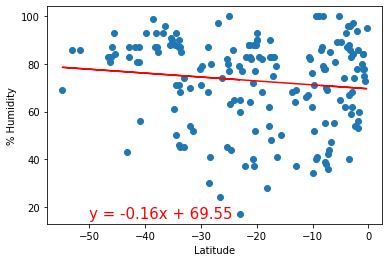

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

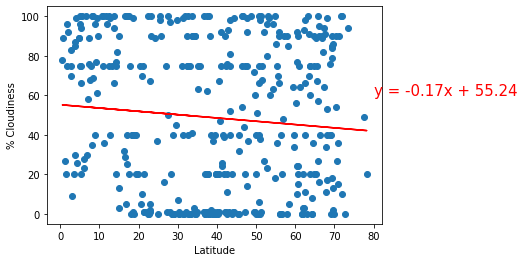

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(80,60))

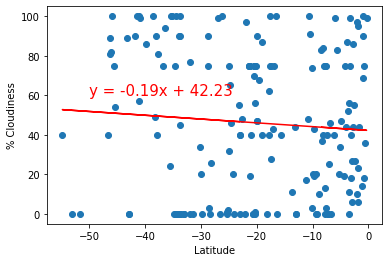

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

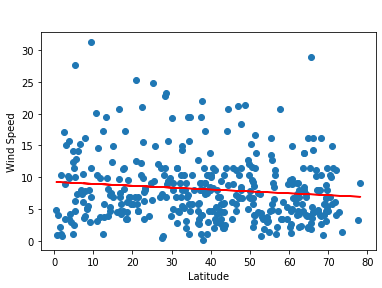

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

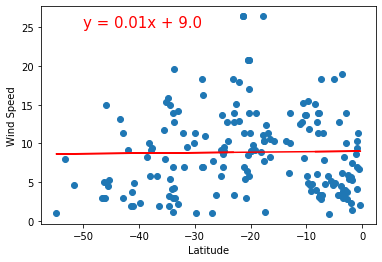

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,25))

In [51]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [52]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Changing max_temp to temps

In [59]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable. Changing weights from max_temp to temps
heat_layer = gmaps.heatmap_layer(locations, weights=temps)
# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Changing heat layer

In [60]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable. Changing weights from max_temp to temps
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [64]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [67]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [68]:
# Heatmap of percent wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [69]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [70]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) &\
                                      (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,75.56,79,55,18.30,PF,2020-06-17 18:03:59
2,Axim,4.87,-2.24,78.15,85,89,12.46,GH,2020-06-17 18:03:59
4,Abeche,13.83,20.83,86.99,38,66,8.14,TD,2020-06-17 18:03:59
5,Carman,49.50,-98.00,88.00,51,1,12.75,CA,2020-06-17 18:04:00
9,Puerto Ayora,-0.74,-90.35,75.20,78,75,11.41,EC,2020-06-17 18:04:00
12,Kerman,30.28,57.08,87.80,10,0,9.17,IR,2020-06-17 18:04:01
13,Atuona,-9.80,-139.03,80.42,71,43,15.46,PF,2020-06-17 18:04:01
15,Veraval,20.90,70.37,84.60,81,70,12.57,IN,2020-06-17 18:04:01
19,Puerto Colombia,10.99,-74.95,89.60,70,75,10.29,CO,2020-06-17 18:04:02
20,Kapaa,22.08,-159.32,77.00,73,1,10.29,US,2020-06-17 18:04:02


In [72]:
# determine if the DataFrame has any null values for any of the rows
preferred_cities_df.isnull().sum()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [73]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Rikitea,PF,75.56,-23.12,-134.97,
2,Axim,GH,78.15,4.87,-2.24,
4,Abeche,TD,86.99,13.83,20.83,
5,Carman,CA,88.00,49.50,-98.00,
9,Puerto Ayora,EC,75.20,-0.74,-90.35,
12,Kerman,IR,87.80,30.28,57.08,
13,Atuona,PF,80.42,-9.80,-139.03,
15,Veraval,IN,84.60,20.90,70.37,
19,Puerto Colombia,CO,89.60,10.99,-74.95,
20,Kapaa,US,77.00,22.08,-159.32,


In [75]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]
    
    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"
    
    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [76]:
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Rikitea,PF,75.56,-23.12,-134.97,Pension Maro'i
2,Axim,GH,78.15,4.87,-2.24,AXIM BEACH RESORT AND SPA
4,Abeche,TD,86.99,13.83,20.83,Assaleh Hamdan Haroune
5,Carman,CA,88.00,49.50,-98.00,"Bell Aura Bed, Breakfast & Bistro"
9,Puerto Ayora,EC,75.20,-0.74,-90.35,Finch Bay Galapagos Hotel
...,...,...,...,...,...,...
556,Marsh Harbour,BS,80.20,26.54,-77.06,Abaco Beach Resort
558,Thinadhoo,MV,84.43,0.53,72.93,
562,Salinas,US,75.99,36.68,-121.66,Good Nite Inn Salinas Monterey
564,Mattru,SL,80.33,7.62,-11.83,Boima Gbondo's Compound


In [78]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0,31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
                                max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [85]:
# Add a heatmap of temperature for the vacation spots. Adding marker_layer
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0,31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
                                max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [87]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))